In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
from sqlalchemy import func
from sqlalchemy import distinct


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Assign to a variables called "Station" and "Measurement"
Station = Base.classes.station
Measurement = Base.classes.measurement


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#Find Cloumn Names - Measurement
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Find Cloumn Names - Station
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23)-dt.timedelta(days = 365)
year_ago

datetime.date(2016, 8, 23)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. Select Date and pcrp
sel = [Measurement.date, 
       Measurement.prcp]
last_year = session.query(*sel).\
    filter(func.strftime(Measurement.date) > '2016-08-23').\
       order_by(Measurement.date).all()
last_year

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [19]:
last_year_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation'])
last_year_df.set_index('Date', inplace=True)

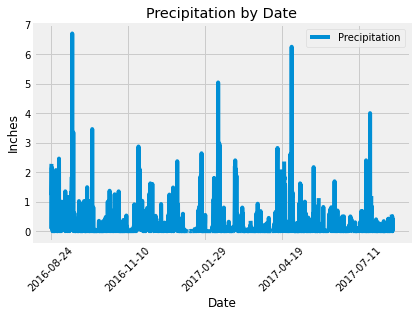

In [20]:
 #Use Pandas to make bar graph
last_year_df.plot()

plt.ylabel("Inches")
plt.title('Precipitation by Date')
plt.xticks(rotation=45)


plt.show()

In [21]:
#Create data frame of the lat year precipitation
last_year_stats = pd.DataFrame(last_year, columns=['Date','Precipitation'])


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_stats = last_year_stats.agg({'Precipitation':["mean", "median", "var", "std", "sem"]})
precip_stats


,Precipitation
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


In [23]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(func.count(distinct(Measurement.station))).all()
number_of_stations

[(9)]

In [24]:
# List the stations and the counts in descending order.
sel = [Measurement.station,
      func.count(Measurement.station)]
stations = session.query(*sel).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
#Locate Station with the most observations
sel = [Measurement.station,
      func.count(Measurement.station)]
most_observations = session.query(*sel).group_by(Measurement.station).order_by((func.count(Measurement.station)).desc()).first()
most_observations

('USC00519281', 2772)

In [26]:
#Filter by the station with the highest number of observations.
sel = [Measurement.station, 
       Measurement.tobs]
most_observed_temps = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime(Measurement.date) > '2016-08-23').\
       order_by(Measurement.date).all()
most_observed_temps

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [27]:
# LOWEST temperature of the most active station
sel = [Measurement.station, 
       Measurement.tobs]
lowest_observed_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime(Measurement.date) > '2016-08-23').\
       order_by(Measurement.tobs).first()
lowest_observed_temp

('USC00519281', 59.0)

In [28]:
# HIGHEST temperature of the most active station
sel = [Measurement.station, 
       Measurement.tobs]
highest_observed_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime(Measurement.date) > '2016-08-23').\
       order_by((Measurement.tobs).desc()).first()
highest_observed_temp

('USC00519281', 83.0)

In [32]:
# AVERAGE temperature of the most active station
sel = [Measurement.tobs]

average_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime(Measurement.date) > '2016-08-23').\
    func.avg(Measurement.tobs)



AttributeError: 'Query' object has no attribute 'func'

In [29]:
#Most Active Station Temps in Data Frame
most_observed_temps_df = pd.DataFrame(most_observed_temps, columns=['Station', 'Temp'])
most_observed_temps_df.set_index('Station', inplace=True)

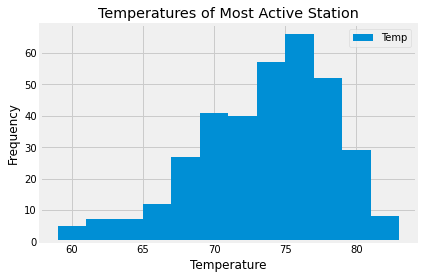

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_observed_temps_df.plot.hist(bins=12)

plt.xlabel("Temperature")
plt.title('Temperatures of Most Active Station')


plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
